<a href="https://colab.research.google.com/github/Kaleab1999/Tweet-analysis/blob/main/tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet analysis
to analyze the number of words in text, location, date, and more.

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install text-hammer

In [4]:
df= pd.read_csv('/content/drive/MyDrive/dataset/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data = df[['airline_sentiment', 'airline', 'text', 'tweet_created']]
data.head()

,airline_sentiment,airline,text,tweet_created
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


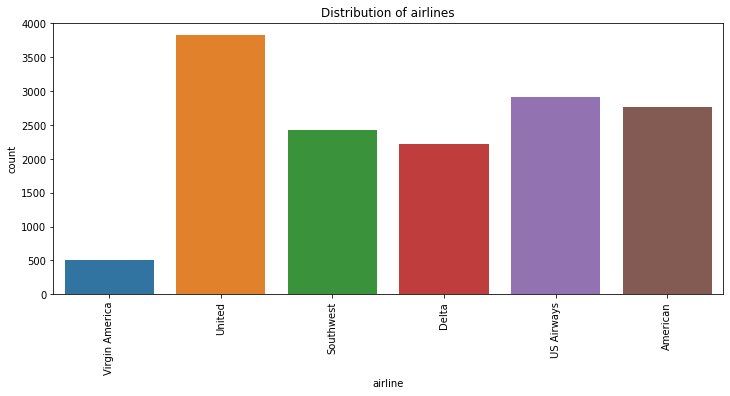

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='airline', data=data)
plt.xlabel('airline')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of airlines')
plt.show()

Many reviews are regarding United airlines

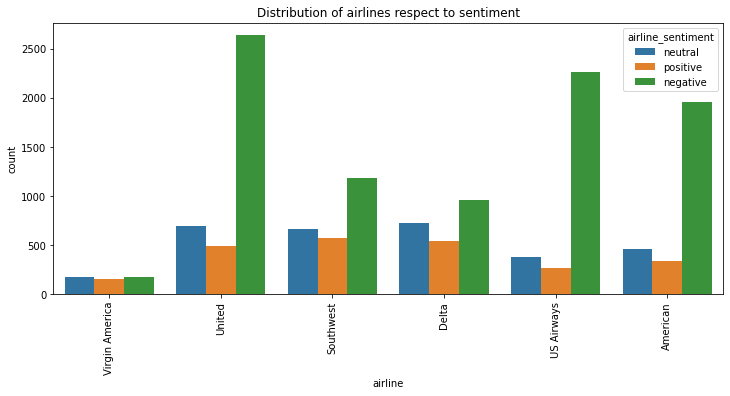

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='airline', data=data, hue='airline_sentiment')
plt.xlabel('airline')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of airlines respect to sentiment')
plt.show()

The distribution of sentiment for virgin America airline is almost same.

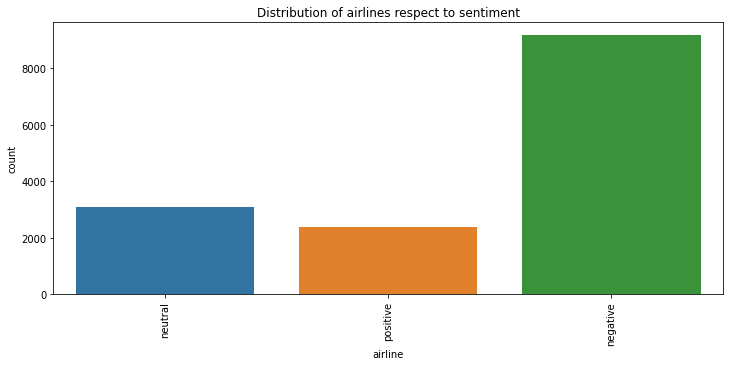

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(x='airline_sentiment', data=data)
plt.xlabel('airline')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of airlines respect to sentiment')
plt.show()

Many reviews are negative.

In [19]:
# calculate word count
data['word count']= data['text'].apply(lambda x: len(x.split()))
data.head()

<ipython-input-19-3759bf7ea74b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word count']= data['text'].apply(lambda x: len(x.split()))


,airline_sentiment,airline,text,tweet_created,word count
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,4
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,9
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,12
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,17
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,10


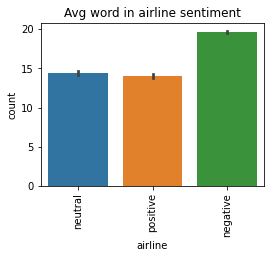

In [24]:
plt.figure(figsize=(4,3))
sns.barplot(x='airline_sentiment', data=data, y= 'word count')
plt.xlabel('airline')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Avg word in airline sentiment')
plt.show()

Negative reviews are the longest in number of words.

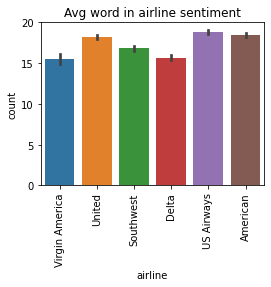

In [33]:
plt.figure(figsize=(4,3))
sns.barplot(x='airline', data=data, y= 'word count')
plt.xlabel('airline')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Avg word in airline sentiment')
plt.show()

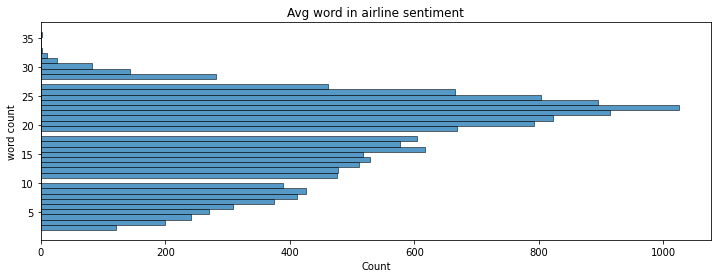

In [31]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, y= 'word count')
plt.title('Avg word in airline sentiment')
plt.show()

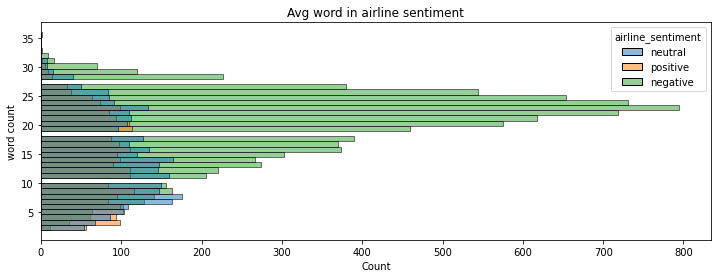

In [32]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, y= 'word count', hue='airline_sentiment')
plt.title('Avg word in airline sentiment')
plt.show()

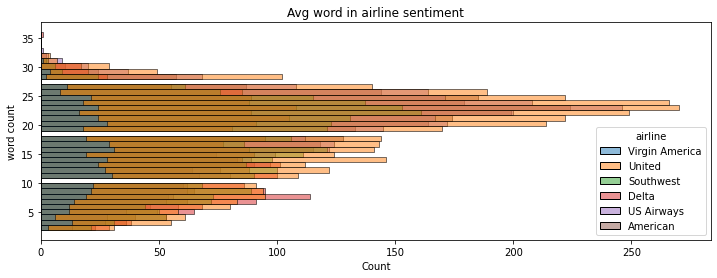

In [34]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, y= 'word count', hue='airline')
plt.title('Avg word in airline sentiment')
plt.show()

In [35]:
import text_hammer as th

In [39]:
data['stop word'] = data['text'].apply(lambda x: th.get_stopwords_counts(x) )
data.head()

<ipython-input-39-0c7e1d838dde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stop word'] = data['text'].apply(lambda x: th.get_stopwords_counts(x) )


,airline_sentiment,airline,text,tweet_created,word count,stop word
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,4,0
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,9,2
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,12,3
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,17,6
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,10,5


In [40]:
data['tweet_created']=  pd.to_datetime(data['tweet_created'])
data.head()

<ipython-input-40-52b491ea398d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_created']=  pd.to_datetime(data['tweet_created'])


,airline_sentiment,airline,text,tweet_created,word count,stop word
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,4,0
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,9,2
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,12,3
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,17,6
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,10,5


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype                                 
---  ------             --------------  -----                                 
 0   airline_sentiment  14640 non-null  object                                
 1   airline            14640 non-null  object                                
 2   text               14640 non-null  object                                
 3   tweet_created      14640 non-null  datetime64[ns, pytz.FixedOffset(-480)]
 4   word count         14640 non-null  int64                                 
 5   stop word          14640 non-null  int64                                 
dtypes: datetime64[ns, pytz.FixedOffset(-480)](1), int64(2), object(3)
memory usage: 686.4+ KB


In [42]:
data['year']= data['tweet_created'].dt.year
data['month']= data['tweet_created'].dt.month
data['day']= data['tweet_created'].dt.dayofweek
data.head()

<ipython-input-42-abc718ead7eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']= data['tweet_created'].dt.year
<ipython-input-42-abc718ead7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']= data['tweet_created'].dt.month
<ipython-input-42-abc718ead7eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,airline_sentiment,airline,text,tweet_created,word count,stop word,year,month,day
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,4,0,2015,2,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,9,2,2015,2,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,12,3,2015,2,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,17,6,2015,2,1
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,10,5,2015,2,1


### Tweet analysis regarding Time

In [43]:
data['day'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','wedensday','Thusday','Friday','Saterday','Sunday'],inplace=True)
data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,airline_sentiment,airline,text,tweet_created,word count,stop word,year,month,day
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,4,0,2015,2,Tuesday
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,9,2,2015,2,Tuesday
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,12,3,2015,2,Tuesday
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,17,6,2015,2,Tuesday
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,10,5,2015,2,Tuesday


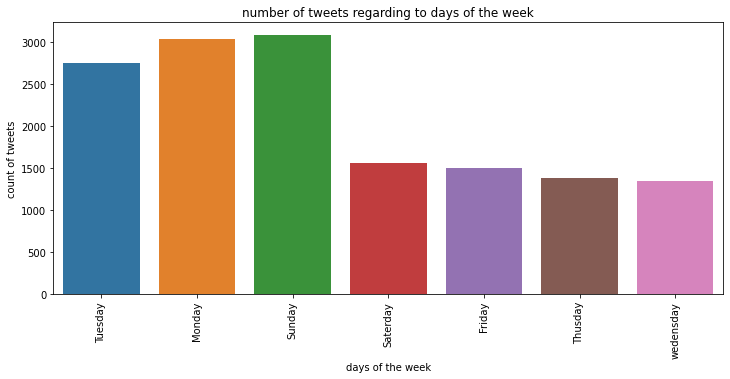

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(x='day', data= data)
plt.xticks(rotation=90)
plt.xlabel('days of the week')
plt.ylabel('count of tweets')
plt.title('number of tweets regarding to days of the week')
plt.show()

Many tweets are tweet on Sunday and Monday then Tuesday

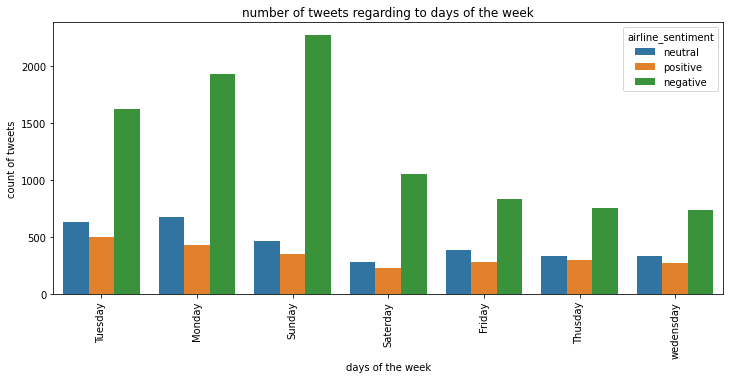

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x='day', data= data, hue= 'airline_sentiment')
plt.xticks(rotation=90)
plt.xlabel('days of the week')
plt.ylabel('count of tweets')
plt.title('number of tweets regarding to days of the week')
plt.show()

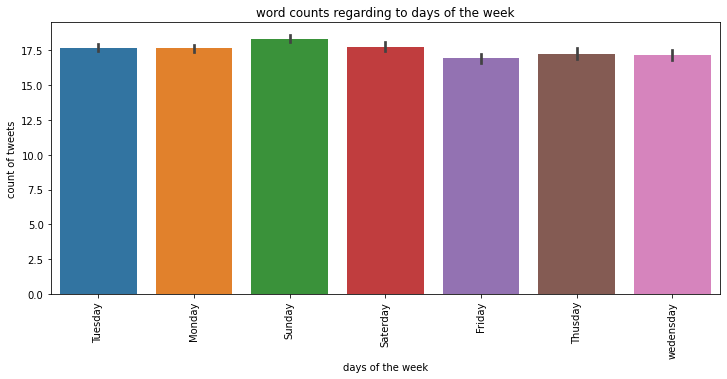

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(x='day', data= data, y= 'word count')
plt.xticks(rotation=90)
plt.xlabel('days of the week')
plt.ylabel('count of tweets')
plt.title('word counts regarding to days of the week')
plt.show()

In [56]:
data['year'].value_counts()

2015    14640
Name: year, dtype: int64

In [57]:
data['month'].value_counts()

2    14640
Name: month, dtype: int64

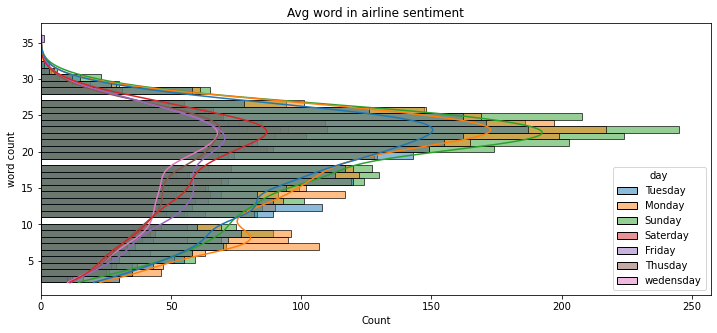

In [63]:
plt.figure(figsize=(12,5))
sns.histplot(data=data, y= 'word count', hue='day', kde= True)
plt.title('Avg word in airline sentiment')
plt.show()

In [70]:
data['text1'] = data['text'].astype(str)

<ipython-input-70-7a9286550e75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text1']= data['text'].astype(str)


### word cloud

In [65]:
from wordcloud import WordCloud

In [73]:
text = " ".join(cat.split()[1] for cat in data['text'])

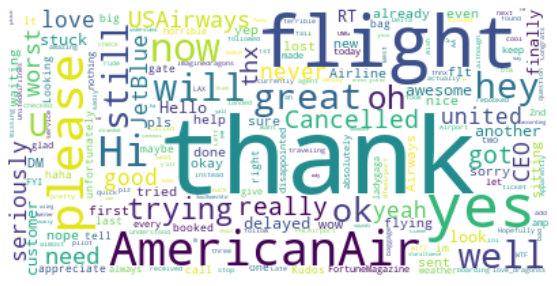

In [75]:
plt.figure(figsize=(10,5))
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()